In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
del df['Product_Category_2']
del df['Product_Category_3']


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [9]:
df['Product_ID'].nunique()

3623

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
 df['Purchase'].sum()

5017668378

In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [15]:
for colname in df.columns:
    print(colname,':',df[colname].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [16]:
df[df['Gender'] == 'M']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [17]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']) , len(df[df['Gender'] == 'F'])]},index = ["Male","Female"])

In [18]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

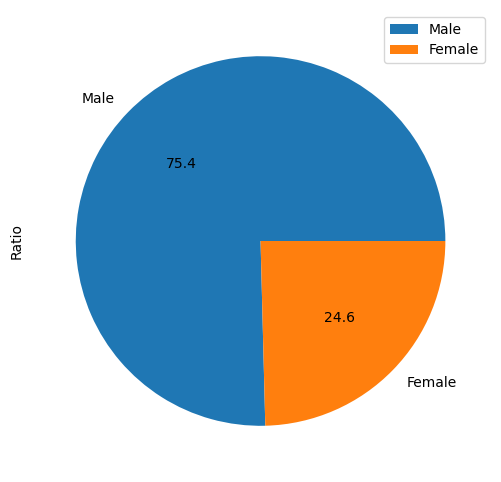

In [19]:
data.plot.pie(y="Ratio",figsize=(6,6),autopct="%.1f")

### Pie chart using group by for easier use

<Axes: title={'center': 'Gender ratio'}>

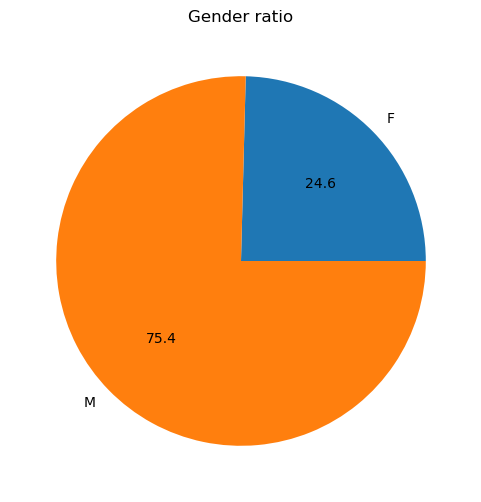

In [21]:
df.groupby('Gender').size().plot(kind = "pie",autopct = "%.1f",title = "Gender ratio",figsize=(6,6))

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

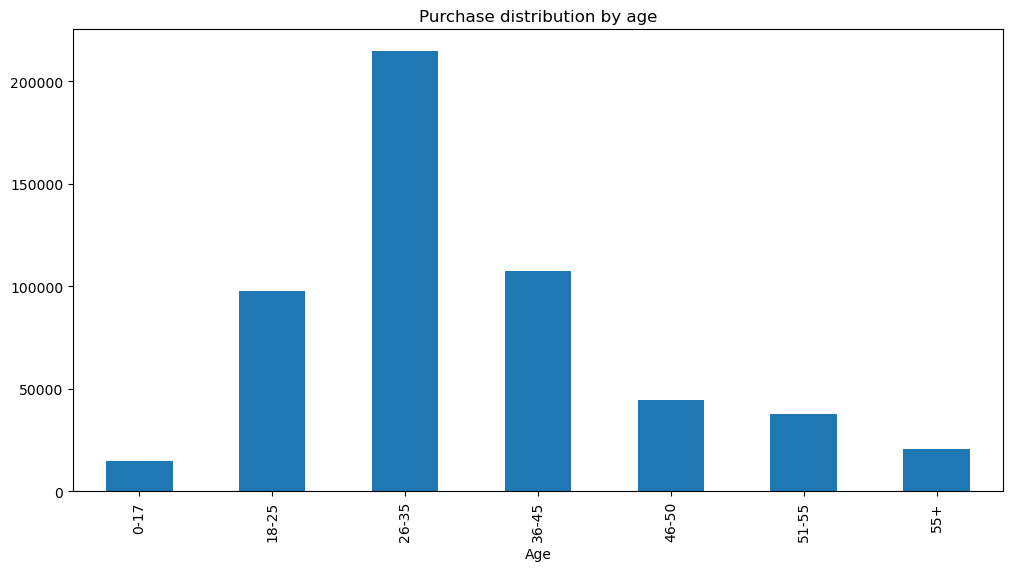

In [22]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title = "Purchase distribution by age")

In [23]:
for i in df['Age'].unique():
    print(i,':',len([df['Age']==i]))

0-17 : 1
55+ : 1
26-35 : 1
46-50 : 1
51-55 : 1
36-45 : 1
18-25 : 1


In [24]:
df[df['Age']=='0-17']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
537280,1004690,P00242742,F,0-17,10,C,3,0,1,11561
537281,1004690,P00226442,F,0-17,10,C,3,0,11,6010
537282,1004690,P00181442,F,0-17,10,C,3,0,11,7458
537283,1004690,P00192042,F,0-17,10,C,3,0,5,3706


In [25]:
df[df['Age']==i]["Product_ID"].nunique()

3213

In [26]:
lst = []
for i in df['Age'].unique():
    lst.append((i, df[df['Age'] == i]['Product_ID'].nunique()))  # Append a tuple

# Convert the list to a DataFrame
data = pd.DataFrame(lst, columns=['Age', 'Products'])


In [27]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


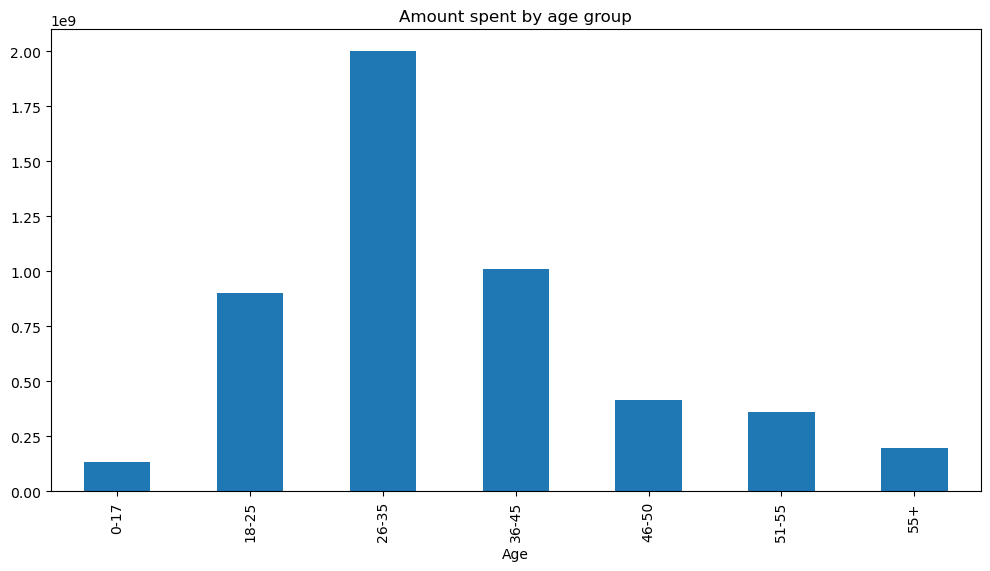

In [28]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,6),title='Amount spent by age group')
plt.show()

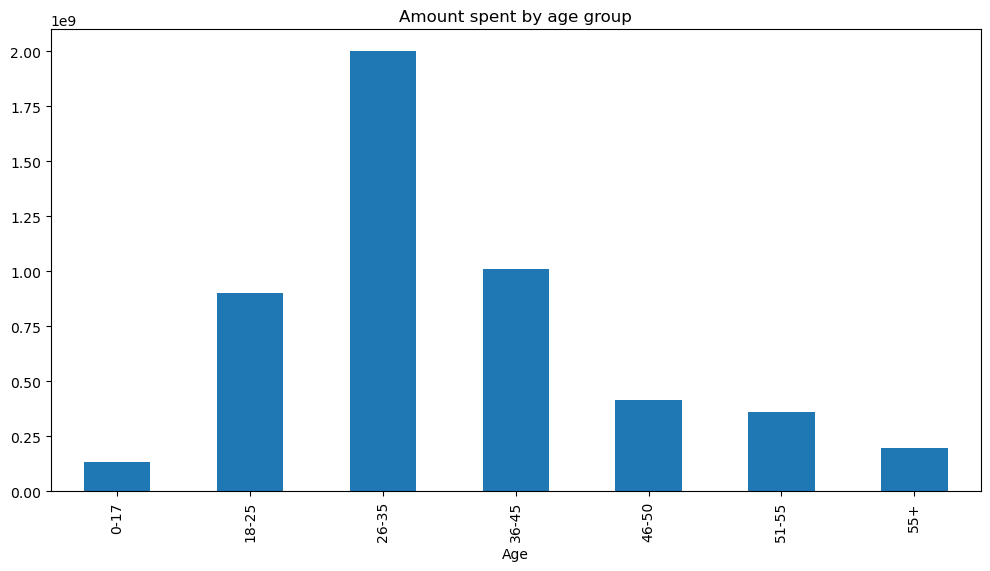

In [29]:
import matplotlib.pyplot as plt

df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(12, 6), title='Amount spent by age group')

# Ensure the plot is displayed
plt.show()


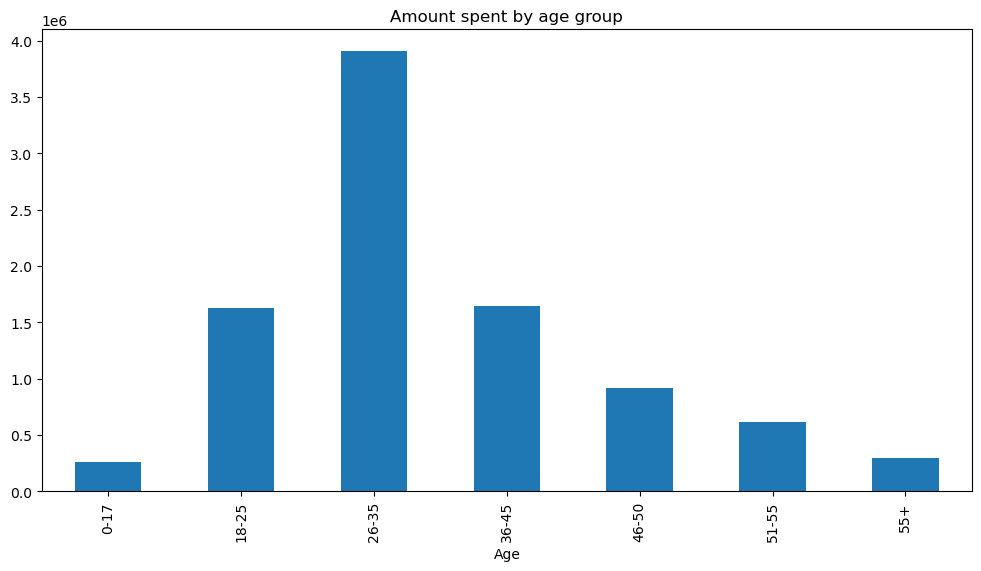

In [30]:
small_df = df.sample(1000)  # Sample 1000 rows randomly
small_df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(12, 6), title='Amount spent by age group')
plt.show()


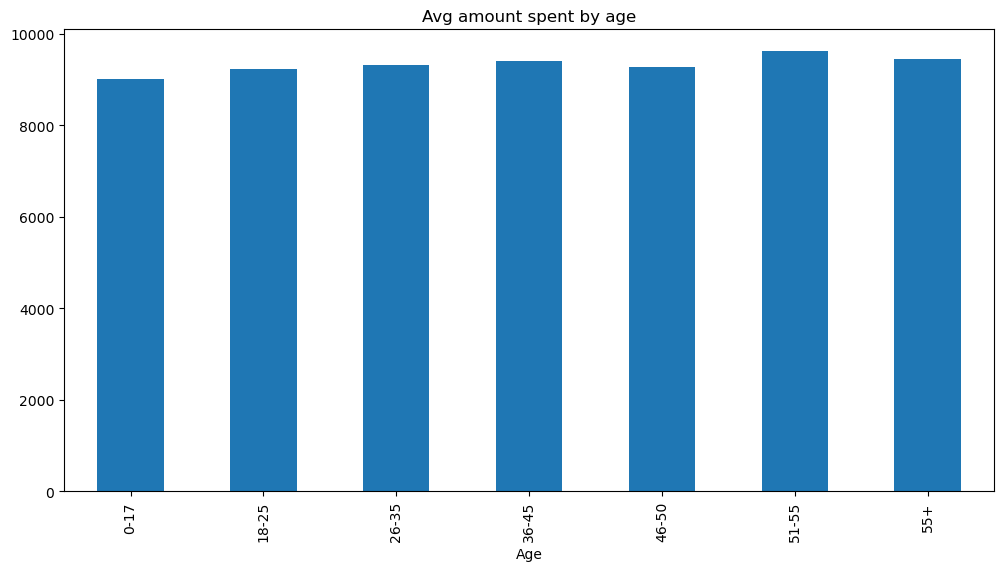

In [31]:

ax = df.groupby('Age')['Purchase'].mean().plot(kind='bar', figsize=(12, 6))
ax.set_title('Avg amount spent by age')
plt.show()


In [32]:
print(df['Purchase'].dtype)


int64


<Axes: ylabel='Purchase'>

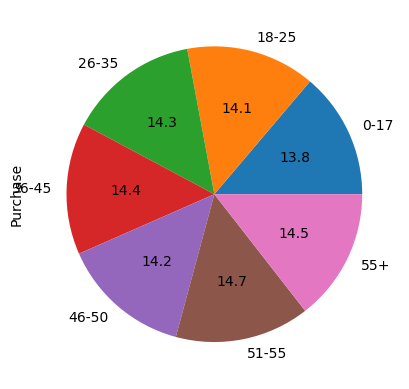

In [33]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie', autopct='%0.1f')


<Axes: >

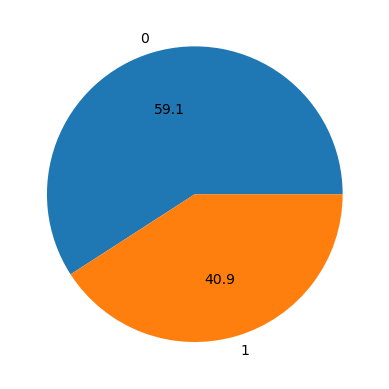

In [34]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%0.1f')


<Axes: >

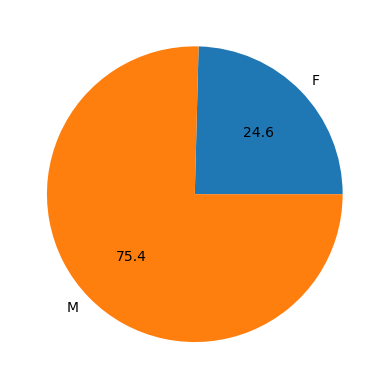

In [35]:
df.groupby('Gender').size().plot(kind='pie', autopct='%0.1f')


## Multi column analysis

<Axes: xlabel='Age', ylabel='count'>

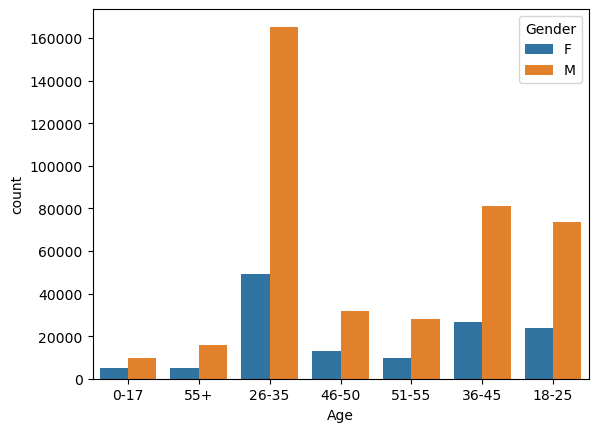

In [37]:
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

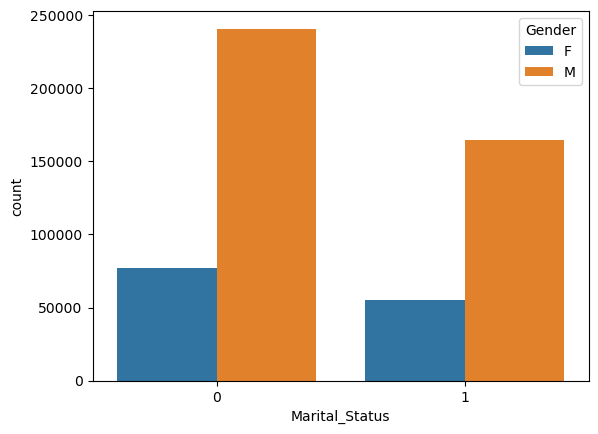

In [38]:
sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

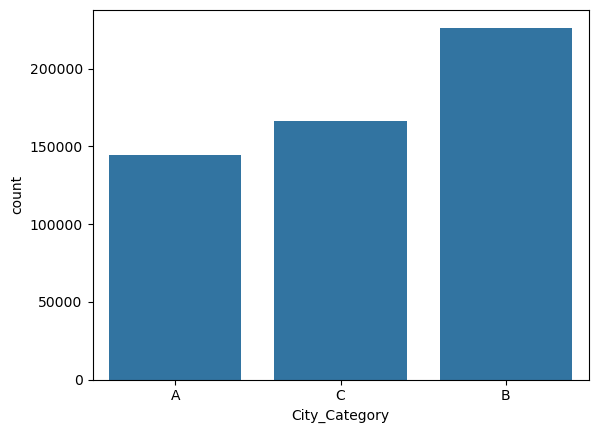

In [39]:
sns.countplot(x = df['City_Category'])

<Axes: >

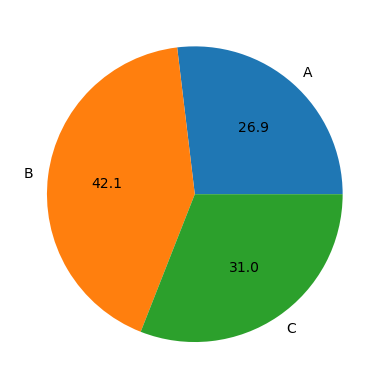

In [40]:
df.groupby('City_Category').size().plot(kind='pie',autopct = '%0.1f')

<Axes: xlabel='Age', ylabel='count'>

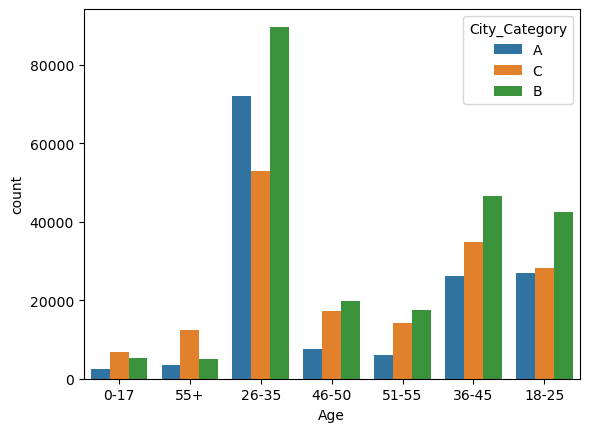

In [41]:
sns.countplot(x='Age',hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

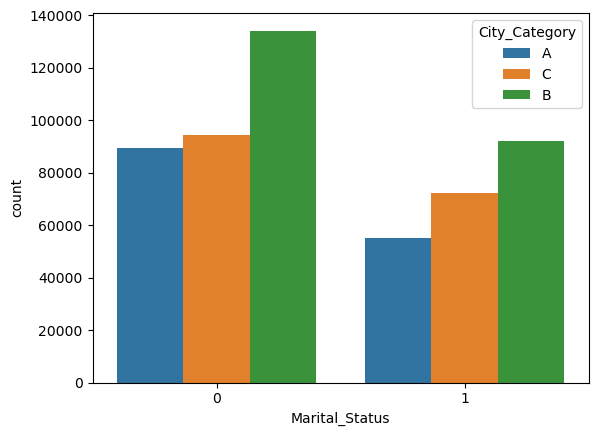

In [42]:
sns.countplot(x='Marital_Status',hue = 'City_Category', data = df)

In [43]:
df.groupby('City_Category')[Purchase].sum().plot(kind = 'bar')

NameError: name 'Purchase' is not defined